In [2]:
#1
import tabula
import numpy as np
import PyPDF2
import pandas as pd
import os
df_V0 = pd.read_csv('historicos1.csv')

In [4]:
#2
df_V0.columns

Index(['1_c', '1_f', '1_n', '2_c', '2_f', '2_n', '3_c', '3_f', '3_n', 'y',
       '4_c', '4_f', '4_n', '5_c', '5_f', '5_n', '6_c', '6_f', '6_n', '7_c',
       '7_f', '7_n', '8_c', '8_f', '8_n', '9_c', '9_f', '9_n', '10_c', '10_f',
       '10_n', '11_c', '11_f', '11_n', '12_c', '12_f', '12_n', '13_c', '13_f',
       '13_n', '14_c', '14_f', '14_n', '15_c', '15_f', '15_n', '16_c', '16_f',
       '16_n', '17_c', '17_f', '17_n', '18_c', '18_f', '18_n', '19_c', '19_f',
       '19_n'],
      dtype='object')

In [10]:
#3
num_nans2 = df_V0['2_c'].isna().sum()
num_nans3 = df_V0['3_c'].isna().sum()
num_nans4 = df_V0['4_c'].isna().sum()
num_nans5 = df_V0['5_c'].isna().sum()
num_nans6 = df_V0['6_c'].isna().sum()
num_nans7 = df_V0['7_c'].isna().sum()
num_nans8 = df_V0['8_c'].isna().sum()
print(num_nans2)
print(num_nans3)
print(num_nans4)
print(num_nans5)
print(num_nans6)
print(num_nans7)
print(num_nans8)


34
58
79
100
113
135
147


In [11]:
#3
colunas_para_deletar_V8 = ['9_c', '9_f', '9_n', '10_c', '10_f', '10_n', '11_c', '11_f', '11_n', '12_c', '12_f', '12_n', '13_c', '13_f', '13_n', '14_c', '14_f', '14_n', '15_c', '15_f', '15_n', '16_c', '16_f', '16_n', '17_c', '17_f', '17_n', '18_c', '18_f', '18_n', '19_c', '19_f', '19_n']
df_V8 = df_V0.drop(columns=colunas_para_deletar_V8)


In [10]:
#4
colunas_para_deletar_V2 = ['3_c', '3_f', '3_n','4_c', '4_f', '4_n', '5_c', '5_f', '5_n', '6_c', '6_f', '6_n', '7_c',
       '7_f', '7_n', '8_c', '8_f', '8_n', '9_c', '9_f', '9_n', '10_c', '10_f', '10_n', '11_c', '11_f', '11_n', '12_c', '12_f', '12_n', '13_c', '13_f', '13_n', '14_c', '14_f', '14_n', '15_c', '15_f', '15_n', '16_c', '16_f', '16_n', '17_c', '17_f', '17_n', '18_c', '18_f', '18_n', '19_c', '19_f', '19_n']
df_V2 = df_V0.drop(columns=colunas_para_deletar_V2)


In [18]:
#5
colunas_para_deletar_V1 = [ '2_c', '2_f', '2_n','3_c', '3_f', '3_n','4_c', '4_f', '4_n', '5_c', '5_f', '5_n', '6_c', '6_f', '6_n', '7_c',
       '7_f', '7_n', '8_c', '8_f', '8_n', '9_c', '9_f', '9_n', '10_c', '10_f', '10_n', '11_c', '11_f', '11_n', '12_c', '12_f', '12_n', '13_c', '13_f', '13_n', '14_c', '14_f', '14_n', '15_c', '15_f', '15_n', '16_c', '16_f', '16_n', '17_c', '17_f', '17_n', '18_c', '18_f', '18_n', '19_c', '19_f', '19_n']

# Deletando as colunas
df_V1 = df_V0.drop(columns=colunas_para_deletar_V1)


In [6]:
#6
df_V1

,1_c,1_f,1_n,y
0,58.666667,69.443333,2.700000,1
1,58.666667,95.483333,6.083333,1
2,57.600000,74.998000,1.020000,1
3,64.000000,37.500000,0.000000,1
4,58.666667,91.838333,4.766667,1
...,...,...,...,...
263,58.666667,92.013333,6.483333,1
264,58.666667,88.541667,6.666667,1
265,58.666667,90.450000,5.083333,1
266,58.666667,94.963333,6.766667,1


In [7]:
#7
num_linhas_nan = df_V1.isnull().any(axis=1).sum()
print(f'Número de linhas com valores NaN: {num_linhas_nan}')


Número de linhas com valores NaN: 0


In [13]:
#8
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
X = df_V1.drop('y', axis=1)  
y = df_V1['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
#9
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier()

# Definir os hiperparâmetros a serem ajustados
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Mostrar os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados:")
print(grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)

# Avaliar o modelo com os melhores hiperparâmetros
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
Melhores hiperparâmetros encontrados:
{'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 10}
Melhor acurácia: 0.8773826458036984
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        24
           1       0.85      0.96      0.90        57

    accuracy                           0.85        81
   macro avg       0.86      0.77      0.80        81
weighted avg       0.85      0.85      0.84        81



In [15]:
#10
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100], 
    'solver': ['liblinear', 'lbfgs'],  
    'max_iter': [100, 200, 500]  
}


log_reg = LogisticRegression()


grid_search_log = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log.fit(X_train, y_train)


print("Melhores parâmetros para Regressão Logística:", grid_search_log.best_params_)
print("Melhor acurácia:", grid_search_log.best_score_)
best_log = grid_search_log.best_estimator_
y_pred = best_log.predict(X_test)
print(classification_report(y_test, y_pred))

Melhores parâmetros para Regressão Logística: {'C': 1, 'max_iter': 100, 'solver': 'lbfgs'}
Melhor acurácia: 0.8238975817923186
              precision    recall  f1-score   support

           0       0.75      0.75      0.75        24
           1       0.89      0.89      0.89        57

    accuracy                           0.85        81
   macro avg       0.82      0.82      0.82        81
weighted avg       0.85      0.85      0.85        81



In [16]:
#11
from sklearn.tree import DecisionTreeClassifier


param_grid_tree = {
    'criterion': ['gini', 'entropy'],  # Critério de divisão
    'max_depth': [3, 5, 10, None],  # Profundidade máxima
    'min_samples_split': [2, 5, 10],  # Mínimo de amostras para dividir um nó
    'min_samples_leaf': [1, 2, 4]  # Mínimo de amostras em cada folha
}


tree_clf = DecisionTreeClassifier(random_state=42)

grid_search_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

print("Melhores parâmetros para Árvore de Decisão:", grid_search_tree.best_params_)
print("Melhor acurácia:", grid_search_tree.best_score_)
best_tree = grid_search_tree.best_estimator_
y_pred = best_tree.predict(X_test)
print(classification_report(y_test, y_pred))

Melhores parâmetros para Árvore de Decisão: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Melhor acurácia: 0.8615931721194878
              precision    recall  f1-score   support

           0       0.59      0.42      0.49        24
           1       0.78      0.88      0.83        57

    accuracy                           0.74        81
   macro avg       0.68      0.65      0.66        81
weighted avg       0.72      0.74      0.73        81



In [17]:
#12
from sklearn.ensemble import GradientBoostingClassifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],  
    'learning_rate': [0.01, 0.1, 0.2], 
    'max_depth': [3, 5, 7],  
    'subsample': [0.8, 1.0]  
}


gb_clf = GradientBoostingClassifier(random_state=42)

grid_search_gb = GridSearchCV(gb_clf, param_grid_gb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)

print("Melhores parâmetros para Gradient Boosting:", grid_search_gb.best_params_)
print("Melhor acurácia:", grid_search_gb.best_score_)
best_gb = grid_search_gb.best_estimator_
y_pred = best_gb.predict(X_test)
print(classification_report(y_test, y_pred))

Melhores parâmetros para Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Melhor acurácia: 0.8611664295874822
              precision    recall  f1-score   support

           0       0.64      0.38      0.47        24
           1       0.78      0.91      0.84        57

    accuracy                           0.75        81
   macro avg       0.71      0.64      0.66        81
weighted avg       0.74      0.75      0.73        81



In [18]:
#13
from sklearn.svm import SVC

param_grid_svm = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf', 'poly'],  
    'gamma': ['scale', 'auto']  
}

svm_clf = SVC()

grid_search_svm = GridSearchCV(svm_clf, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

print("Melhores parâmetros para SVM:", grid_search_svm.best_params_)
print("Melhor acurácia:", grid_search_svm.best_score_)
best_svm = grid_search_svm.best_estimator_
y_pred = best_svm.predict(X_test)
print(classification_report(y_test, y_pred))

Melhores parâmetros para SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Melhor acurácia: 0.8401137980085348
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        24
           1       0.91      0.88      0.89        57

    accuracy                           0.85        81
   macro avg       0.82      0.83      0.83        81
weighted avg       0.86      0.85      0.85        81



In [18]:
#14
print(df_V1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1_c     268 non-null    float64
 1   1_f     268 non-null    float64
 2   1_n     268 non-null    float64
 3   y       268 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 8.5 KB
None


In [19]:
#15
print(df_V1.describe())

              1_c         1_f         1_n           y
count  268.000000  268.000000  268.000000  268.000000
mean    58.835587   86.828278    5.801973    0.727612
std      3.132177   16.212508    2.706306    0.446021
min     32.000000   17.967500    0.000000    0.000000
25%     58.666667   85.718333    4.291667    0.000000
50%     58.666667   92.012722    6.650000    1.000000
75%     58.666667   96.560250    8.016667    1.000000
max     78.000000  100.000000    9.783333    1.000000


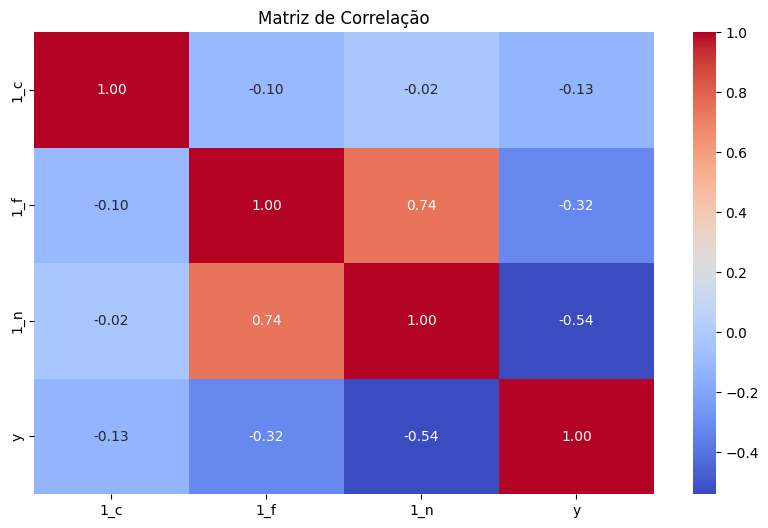

In [19]:
#16
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(df_V1.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

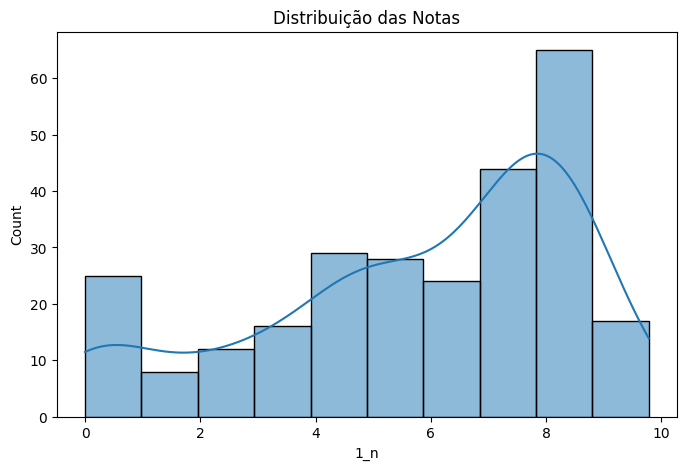

In [24]:
#17
plt.figure(figsize=(8, 5))
sns.histplot(df_V1['1_n'], bins=10, kde=True)
plt.title("Distribuição das Notas")
plt.show()

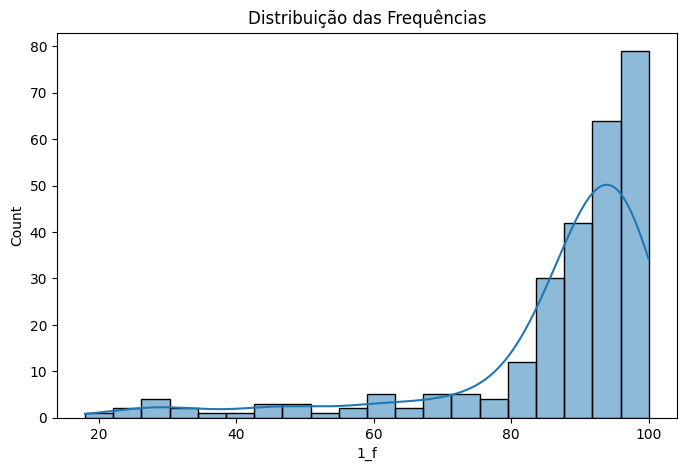

In [26]:
#18
plt.figure(figsize=(8, 5))
sns.histplot(df_V1['1_f'], bins=20, kde=True)
plt.title("Distribuição das Frequências")
plt.show()

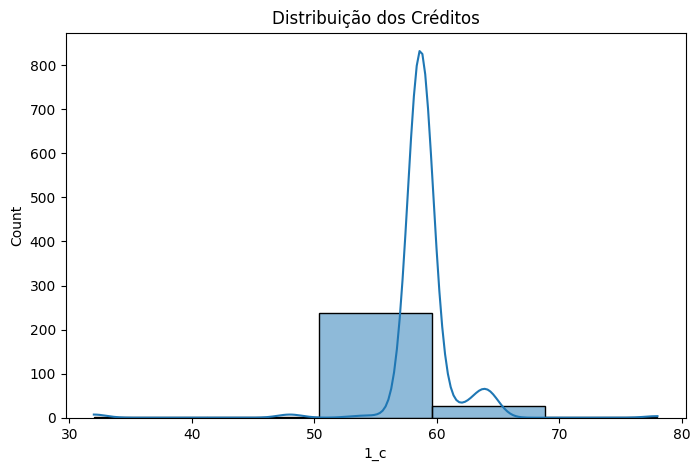

In [27]:
#19
plt.figure(figsize=(8, 5))
sns.histplot(df_V1['1_c'], bins=5, kde=True)
plt.title("Distribuição dos Créditos")
plt.show()

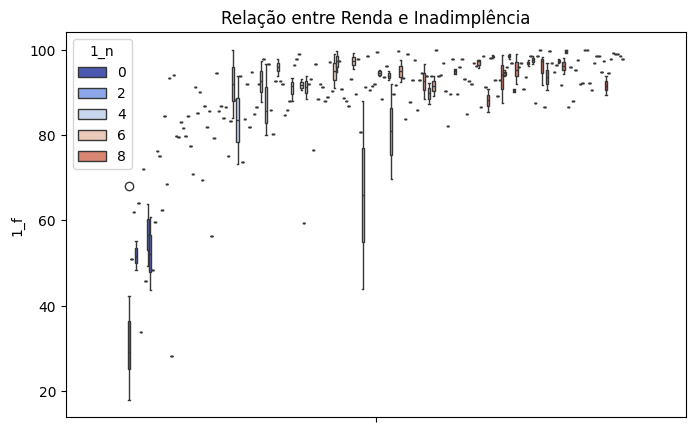

In [46]:
#20
plt.figure(figsize=(8, 5))
sns.boxplot(hue="1_n", y="1_f", data=df_V1, palette="coolwarm")
plt.title("Relação entre Renda e Inadimplência")
plt.show()

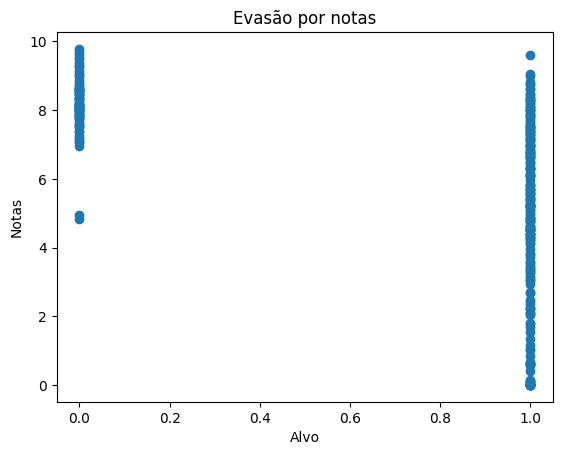

In [28]:
#21
plt.scatter(df_V1['y'], df_V1['1_n'])

plt.xlabel('Alvo')
plt.ylabel('Notas')
plt.title('Evasão por notas')

plt.show()

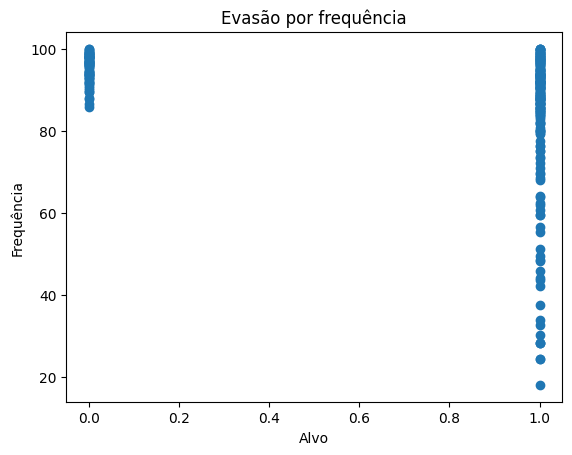

In [29]:
#22
plt.scatter(df_V1['y'], df_V1['1_f'])

plt.xlabel('Alvo')
plt.ylabel('Frequência')
plt.title('Evasão por frequência')

plt.show()